In [86]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
from warnings import filterwarnings
filterwarnings('ignore')
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [87]:
data = xr.open_mfdataset('C:/Users/hp/OneDrive/Desktop/PYTHON/THAILAND2/*.nc')
Thailand = data.where(data != -99.0)

In [89]:
Thailand_data = Thailand.precip
Thailand_data

<xarray.DataArray 'precip' (datetime: 3652, lat: 61, lon: 35)>
dask.array<where, shape=(3652, 61, 35), dtype=float32, chunksize=(366, 61, 35), chunktype=numpy.ndarray>
Coordinates:
  * lon       (lon) float32 97.25 97.5 97.75 98.0 ... 105.0 105.2 105.5 105.8
  * lat       (lat) float32 20.75 20.5 20.25 20.0 19.75 ... 6.5 6.25 6.0 5.75
  * datetime  (datetime) datetime64[ns] 2001-01-01 2001-01-02 ... 2010-12-31
Attributes:
    grid_mapping:  crs

In [90]:
monthly_data = Thailand_data.groupby('datetime.month')
yearly_data = Thailand_data.groupby('datetime.year')

In [91]:
# monthly rainfall totals
mon_rainfall_totals = monthly_data.sum('datetime')

# monthly climatologies rainfall totals
mon_mean_climo_totals = monthly_data.sum('datetime').mean('month')

In [92]:
# annual totals
annual_totals = yearly_data.sum()

# annual climatology totals
annual_climo_totals = yearly_data.sum('datetime').mean('year')

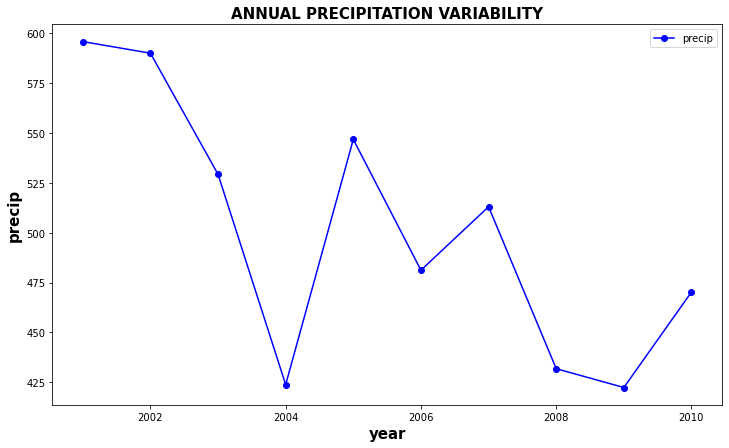

In [93]:
#plotting time series
fig,ax = plt.subplots(figsize = (12,7))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
plt.plot(annual_totals.year,annual_totals.mean(['lon','lat']),color = 'blue', lw = 1.5 ,label= 'precip',marker='o')
ax.set_title('ANNUAL PRECIPITATION VARIABILITY', fontweight = 'bold', fontsize=15 ,color = 'black')
ax.set_xlabel("year", fontweight = 'bold',fontsize = 15, color= 'black')
ax.set_ylabel('precip', fontweight = 'bold', fontsize = 15, color= 'black')
plt.legend()
plt.savefig('1.jpeg');

In [94]:
#DRY days per year
dryDays_per_year = Thailand_data.where(Thailand_data < 1).groupby('datetime.year').count('datetime')

#WET days per year
wetDays_per_year = Thailand_data.where(Thailand_data >= 1).groupby('datetime.year').count('datetime')

#DRY days per MONTH
dryDays_per_month = Thailand_data.where(Thailand_data < 1).groupby('datetime.month').count('datetime')

#WET days per MONTH
wetDays_per_month = Thailand_data.where(Thailand_data >= 1).groupby('datetime.month').count('datetime')

# Extreme Rainfall >10mm per year
Xrain10 = Thailand_data.where(Thailand_data > 10).groupby('datetime.year').count('datetime')

# Extreme Rainfall >20mm per year
Xrain20 = Thailand_data.where(Thailand_data > 20).groupby('datetime.year').count('datetime')

# Extreme Rainfall >10mm per month
Xrain10M = Thailand_data.where(Thailand_data > 10).groupby('datetime.month').count('datetime')

# Extreme Rainfall >10mm per month
Xrain20M = Thailand_data.where(Thailand_data > 20).groupby('datetime.month').count('datetime')

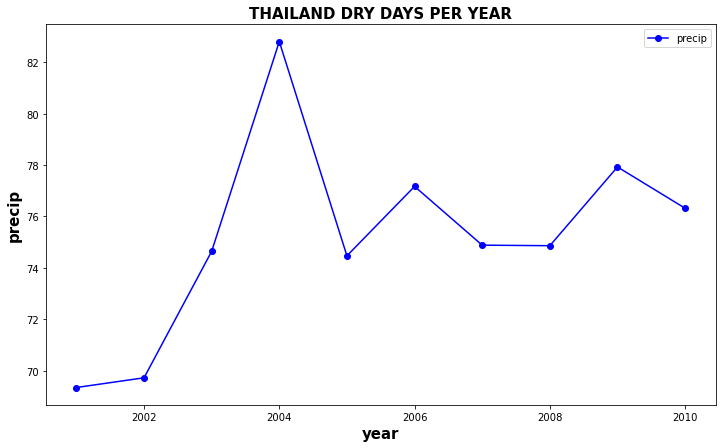

In [95]:
#plotting time series for drydays per year
fig,ax = plt.subplots(figsize = (12,7))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
plt.plot(annual_totals.year,dryDays_per_year.mean(['lon','lat']),color = 'blue', lw = 1.5 ,label= 'precip',marker='o')
ax.set_title('THAILAND DRY DAYS PER YEAR', fontweight = 'bold', fontsize=15 ,color = 'black')
ax.set_xlabel("year", fontweight = 'bold',fontsize = 15, color= 'black')
ax.set_ylabel('precip', fontweight = 'bold', fontsize = 15, color= 'black')
plt.legend()
plt.savefig('done.png');

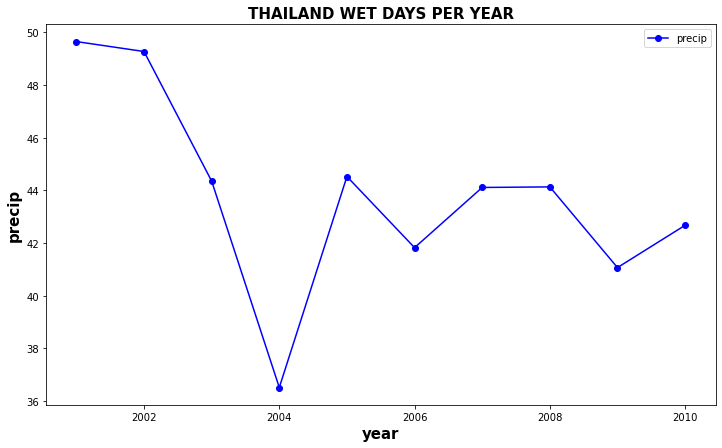

In [96]:
#plotting time series for wetdays per year
fig,ax = plt.subplots(figsize = (12,7))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
plt.plot(annual_totals.year,wetDays_per_year.mean(['lon','lat']),color = 'blue', lw = 1.5 ,label= 'precip',marker='o')
ax.set_title('THAILAND WET DAYS PER YEAR', fontweight = 'bold', fontsize=15 ,color = 'black')
ax.set_xlabel("year", fontweight = 'bold',fontsize = 15, color= 'black')
ax.set_ylabel('precip', fontweight = 'bold', fontsize = 15, color= 'black')
plt.legend()
plt.savefig('done.png');

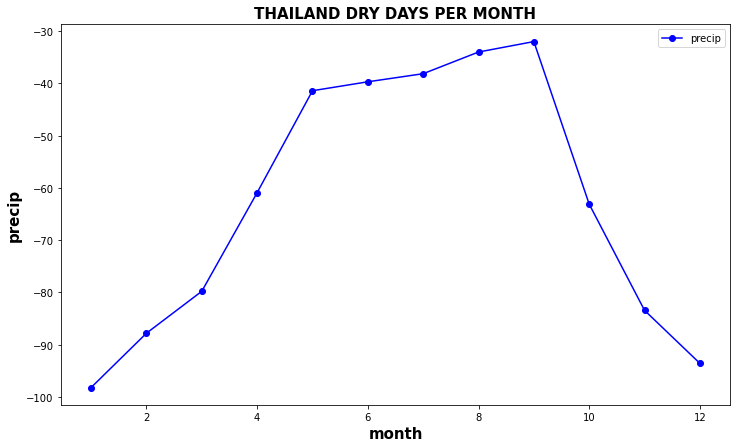

In [97]:
fig,ax = plt.subplots(figsize = (12,7))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
plt.plot(mon_rainfall_totals.month,dryDays_per_month.mean(['lon','lat'])*-1,color = 'blue', lw = 1.5 ,label= 'precip',marker='o')
ax.set_title('THAILAND DRY DAYS PER MONTH', fontweight = 'bold', fontsize=15 ,color = 'black')
ax.set_xlabel("month", fontweight = 'bold',fontsize = 15, color= 'black')
ax.set_ylabel('precip', fontweight = 'bold', fontsize = 15, color= 'black')
plt.legend()
plt.savefig('done.png');

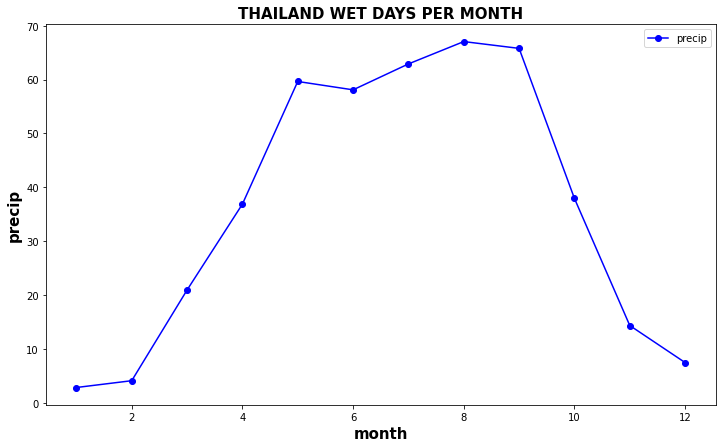

In [100]:
fig,ax = plt.subplots(figsize = (12,7))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
plt.plot(mon_rainfall_totals.month,wetDays_per_month.mean(['lon','lat']),color = 'blue', lw = 1.5 ,label= 'precip',marker='o')
ax.set_title('THAILAND WET DAYS PER MONTH', fontweight = 'bold', fontsize=15 ,color = 'black')
ax.set_xlabel("month", fontweight = 'bold',fontsize = 15, color= 'black')
ax.set_ylabel('precip', fontweight = 'bold', fontsize = 15, color= 'black')
plt.legend()
plt.savefig('done.png');

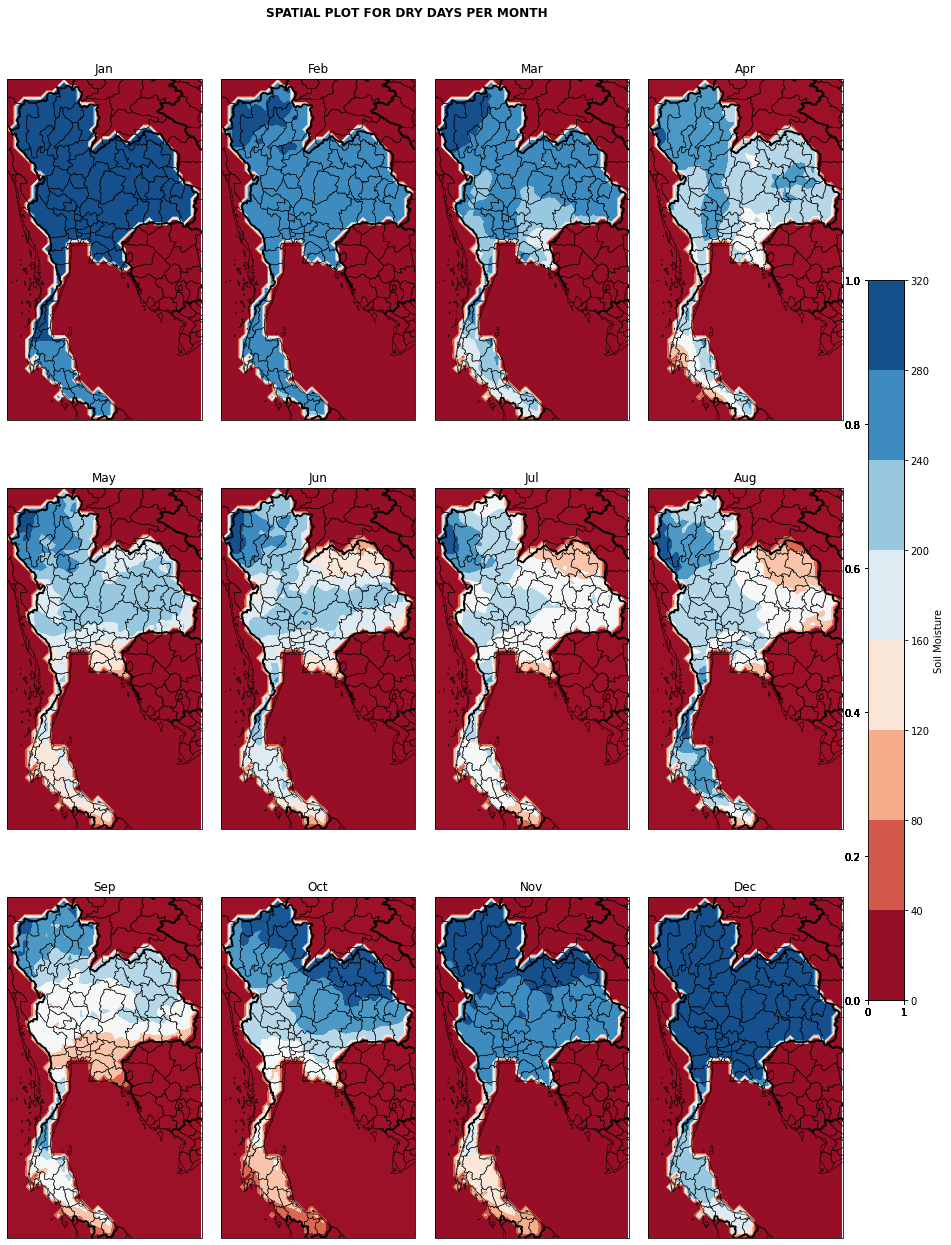

In [102]:
# spatial plots for dry days per month
fig,ax=plt.subplots(3,4,figsize=(20,20), 
                    subplot_kw={'projection': ccrs.PlateCarree()},squeeze=0.1)
ax=ax.flatten()
month_names=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
for i in range(12):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.STATES, linewidth=0.5)
#     ax[i].add_feature(cfeature.OCEAN)
#     ax[i].add_feature(cfeature.LAKES, color='blue')
#     ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([97.25,105.8,20.75,5.75])
    
    ax[i].set_title(month_names[i])
    cb= ax[i].contourf(dryDays_per_month.lon, dryDays_per_month.lat, dryDays_per_month[i],
                       cmap='RdBu', transform=ccrs.PlateCarree(),zorder=-2)
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='Soil Moisture')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('SPATIAL PLOT FOR DRY DAYS PER MONTH', fontweight='bold');
plt.savefig('done.png');

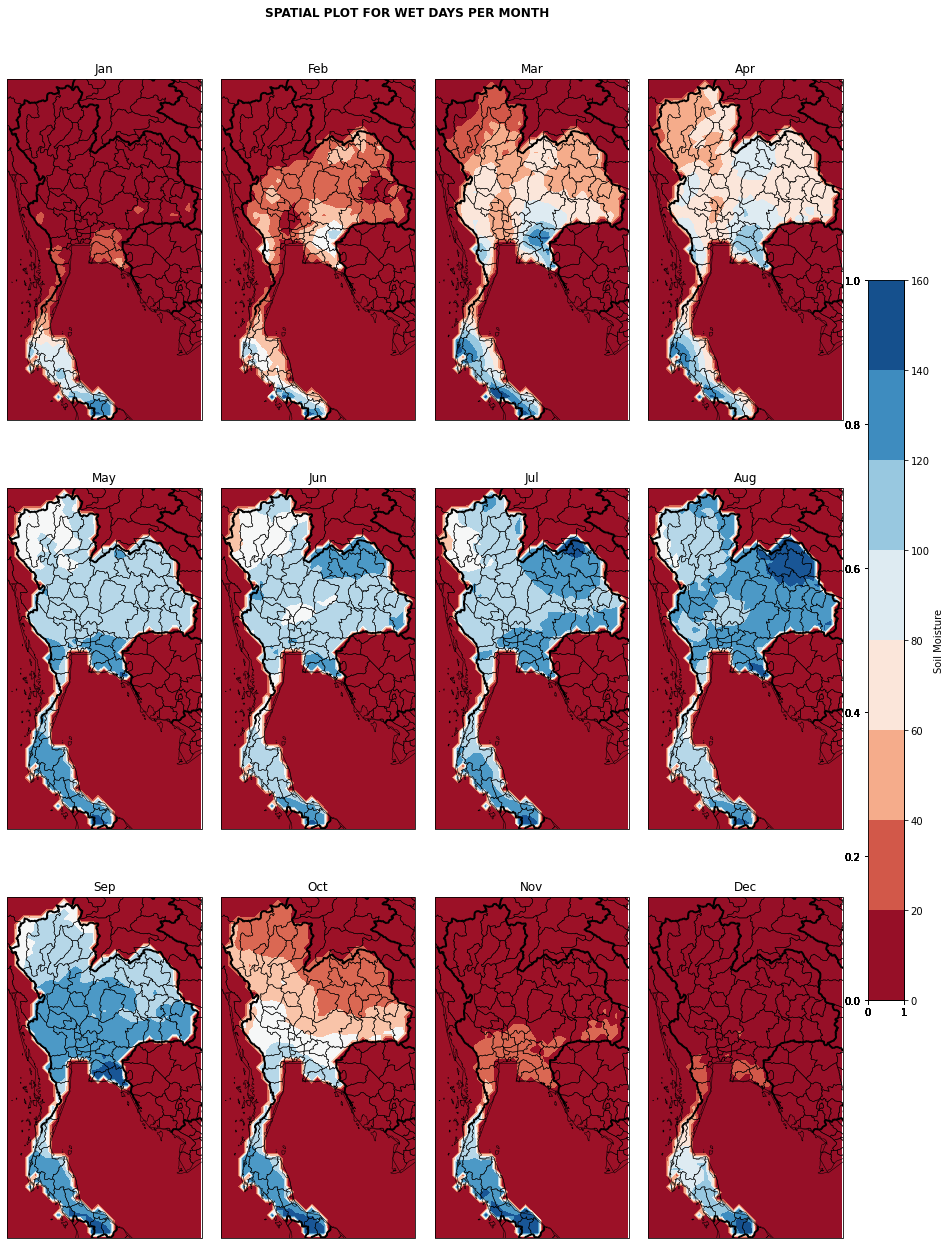

In [104]:
# spatial plots for dry and wet days per year and per month
fig,ax=plt.subplots(3,4,figsize=(20,20), 
                    subplot_kw={'projection': ccrs.PlateCarree()},squeeze=0.1)
ax=ax.flatten()
month_names=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
for i in range(12):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.STATES, linewidth=0.5)
#     ax[i].add_feature(cfeature.OCEAN)
#     ax[i].add_feature(cfeature.LAKES, color='blue')
#     ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([97.25,105.8,20.75,5.75])
    
    ax[i].set_title(month_names[i])
    cb= ax[i].contourf(wetDays_per_month.lon, wetDays_per_month.lat, wetDays_per_month[i],
                       cmap='RdBu', transform=ccrs.PlateCarree(),zorder=-2)
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='Soil Moisture')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('SPATIAL PLOT FOR WET DAYS PER MONTH', fontweight='bold');
plt.savefig('done.png');

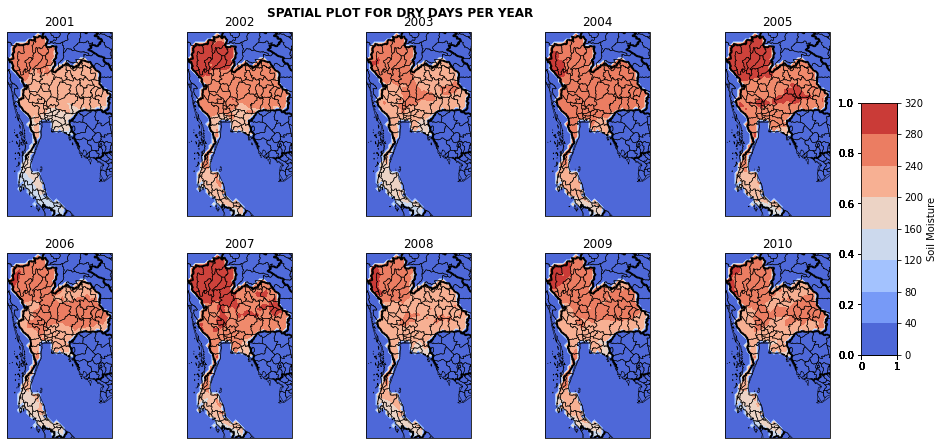

In [106]:
# spatial plots for dry days per year
fig,ax=plt.subplots(2,5,figsize=(20,7), 
                    subplot_kw={'projection': ccrs.PlateCarree()})
ax=ax.flatten()
month_names=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct']
for i in range(10):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.STATES, linewidth=0.5)
#     ax[i].add_feature(cfeature.OCEAN)
#     ax[i].add_feature(cfeature.LAKES, color='blue')
#     ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([97.25,105.8,20.75,5.75])
    ax[i].set_title(annual_totals.year.data[i])
    cb= ax[i].contourf(dryDays_per_year.lon, dryDays_per_year.lat, dryDays_per_year[i],
                       cmap='coolwarm', transform=ccrs.PlateCarree(),zorder=-2)
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='Soil Moisture')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('SPATIAL PLOT FOR DRY DAYS PER YEAR', fontweight='bold');
plt.savefig('done.png');

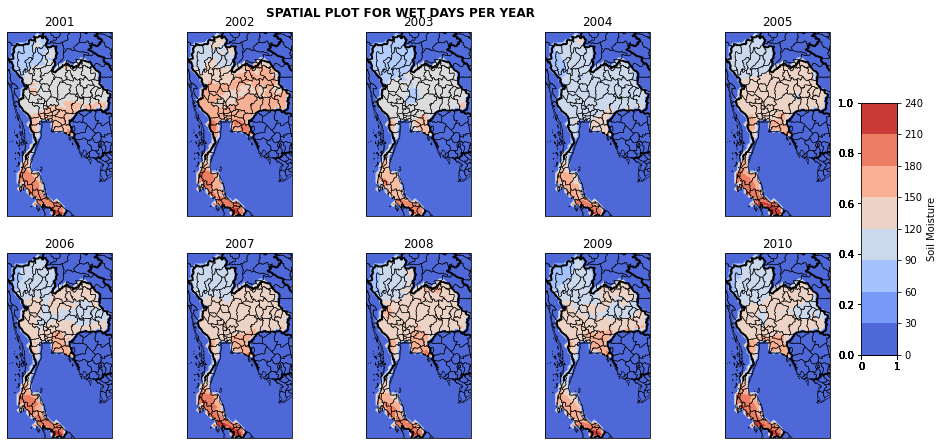

In [109]:
# spatial plots for dry days per year
fig,ax=plt.subplots(2,5,figsize=(20,7), 
                    subplot_kw={'projection': ccrs.PlateCarree()})
ax=ax.flatten()
month_names=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct']
for i in range(10):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.STATES, linewidth=0.5)
#     ax[i].add_feature(cfeature.OCEAN)
#     ax[i].add_feature(cfeature.LAKES, color='blue')
#     ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([97.25,105.8,20.75,5.75])
    ax[i].set_title(annual_totals.year.data[i])
    cb= ax[i].contourf(wetDays_per_year.lon, wetDays_per_year.lat, wetDays_per_year[i],
                       cmap='coolwarm', transform=ccrs.PlateCarree(),zorder=-2)
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='Soil Moisture')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('SPATIAL PLOT FOR WET DAYS PER YEAR', fontweight='bold');
plt.savefig('done.png');

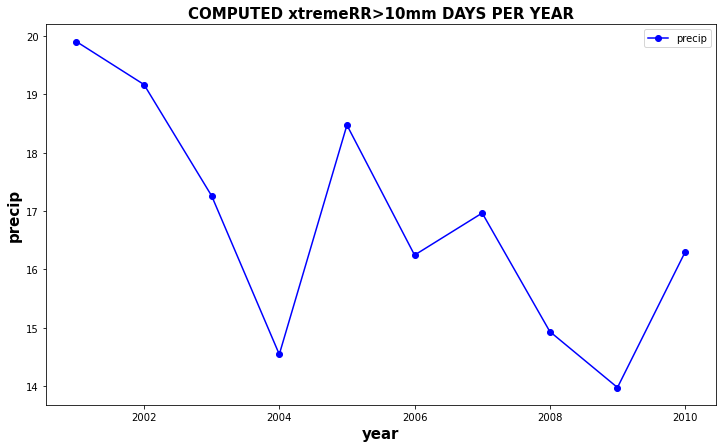

In [110]:
#plotting time series for xtremerr>10mm per year
fig,ax = plt.subplots(figsize = (12,7))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
plt.plot(Xrain10.year,Xrain10.mean(['lon','lat']),color = 'blue', lw = 1.5 ,label= 'precip',marker='o')
ax.set_title('COMPUTED xtremeRR>10mm DAYS PER YEAR', fontweight = 'bold', fontsize=15 ,color = 'black')
ax.set_xlabel("year", fontweight = 'bold',fontsize = 15, color= 'black')
ax.set_ylabel('precip', fontweight = 'bold', fontsize = 15, color= 'black')
plt.legend()
plt.savefig('done.png');

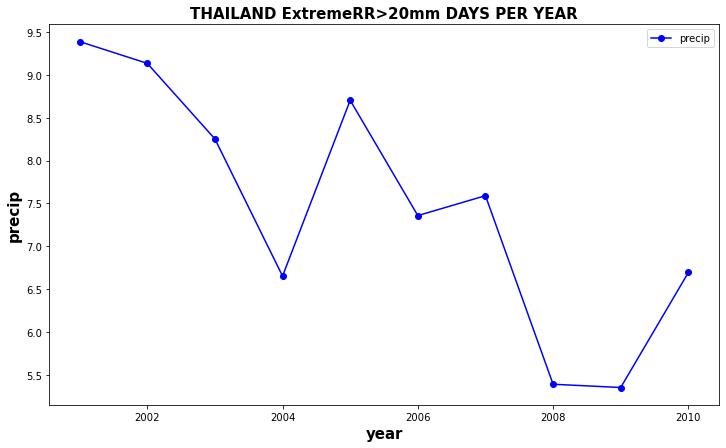

In [117]:
#plotting time series for xtremerr>20mm per year
fig,ax = plt.subplots(figsize = (12,7))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
plt.plot(Xrain20.year,Xrain20.mean(['lon','lat']),color = 'blue', lw = 1.5 ,label= 'precip',marker='o')
ax.set_title('THAILAND ExtremeRR>20mm DAYS PER YEAR', fontweight = 'bold', fontsize=15 ,color = 'black')
ax.set_xlabel("year", fontweight = 'bold',fontsize = 15, color= 'black')
ax.set_ylabel('precip', fontweight = 'bold', fontsize = 15, color= 'black')
plt.legend()
plt.savefig('done.png');

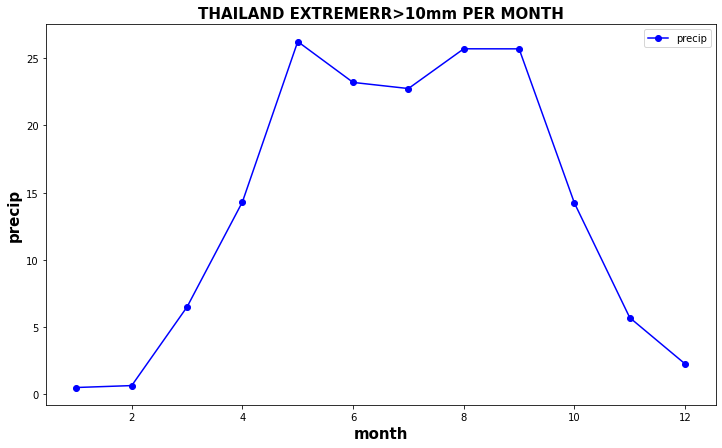

In [118]:
fig,ax = plt.subplots(figsize = (12,7))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
plt.plot(Xrain10M.month,Xrain10M.mean(['lon','lat']),color = 'blue', lw = 1.5 ,label= 'precip',marker='o')
ax.set_title('THAILAND EXTREMERR>10mm PER MONTH', fontweight = 'bold', fontsize=15 ,color = 'black')
ax.set_xlabel("month", fontweight = 'bold',fontsize = 15, color= 'black')
ax.set_ylabel('precip', fontweight = 'bold', fontsize = 15, color= 'black')
plt.legend()
plt.savefig('done.png');

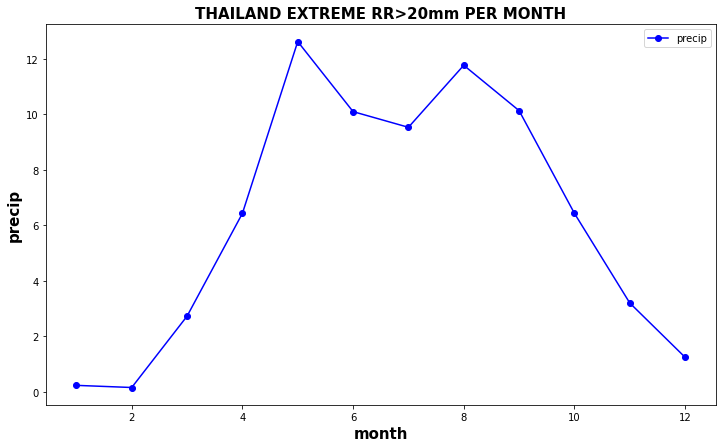

In [119]:
fig,ax = plt.subplots(figsize = (12,7))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
plt.plot(Xrain20M.month,Xrain20M.mean(['lon','lat']),color = 'blue', lw = 1.5 ,label= 'precip',marker='o')
ax.set_title('THAILAND EXTREME RR>20mm PER MONTH', fontweight = 'bold', fontsize=15 ,color = 'black')
ax.set_xlabel("month", fontweight = 'bold',fontsize = 15, color= 'black')
ax.set_ylabel('precip', fontweight = 'bold', fontsize = 15, color= 'black')
plt.legend()
plt.savefig('done.png');

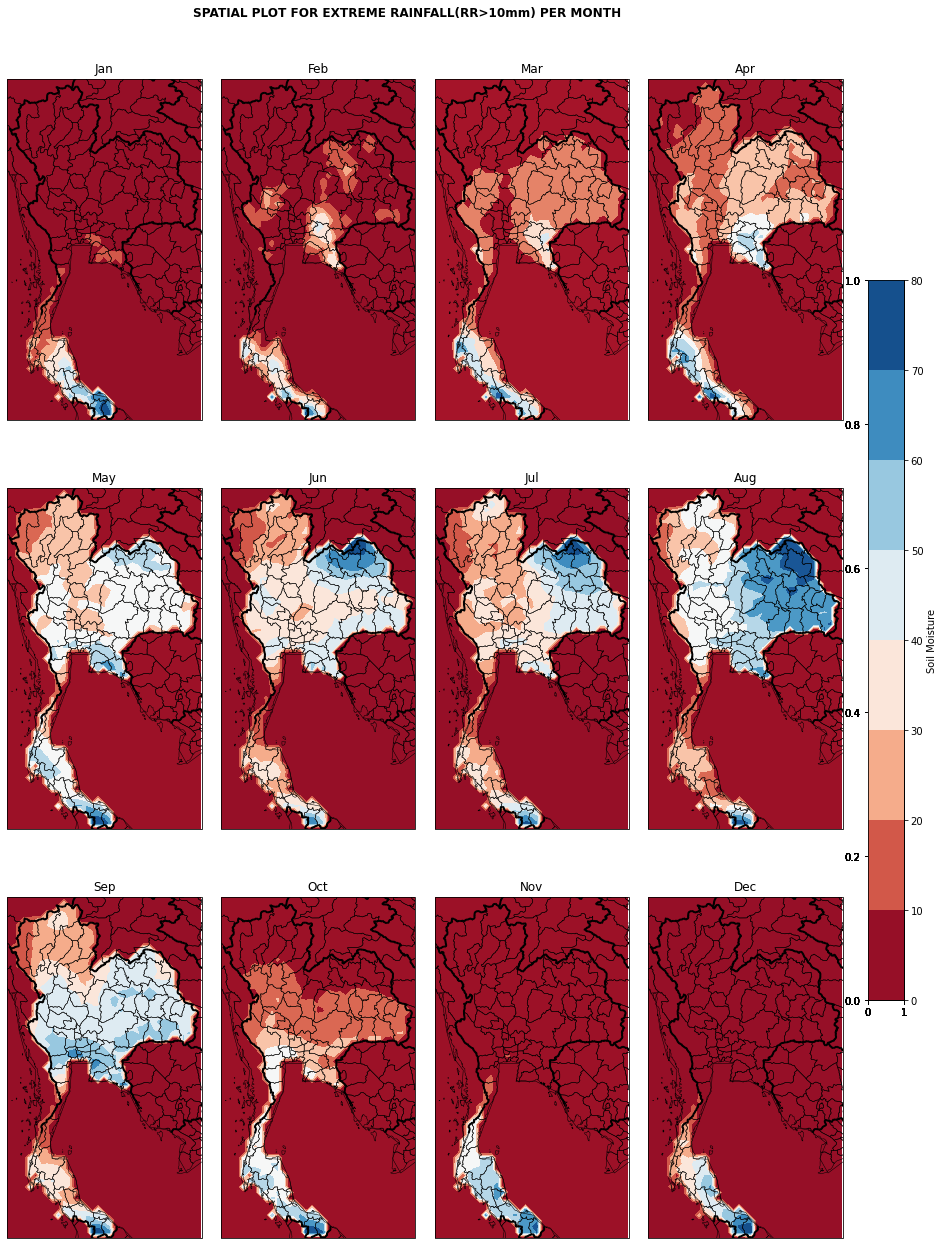

In [122]:
# spatial plots for XTREME RAINFALL 
fig,ax=plt.subplots(3,4,figsize=(20,20), 
                    subplot_kw={'projection': ccrs.PlateCarree()},squeeze=0.1)
ax=ax.flatten()
month_names=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
for i in range(12):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.STATES, linewidth=0.5)
#     ax[i].add_feature(cfeature.OCEAN)
#     ax[i].add_feature(cfeature.LAKES, color='blue')
#     ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([97.25,105.8,20.75,5.75])
    
    ax[i].set_title(month_names[i])
    cb= ax[i].contourf(Xrain10M.lon, Xrain10M.lat, Xrain10M[i],
                       cmap='RdBu', transform=ccrs.PlateCarree(),zorder=-2)
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='Soil Moisture')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('SPATIAL PLOT FOR EXTREME RAINFALL(RR>10mm) PER MONTH', fontweight='bold');
plt.savefig('done.png');

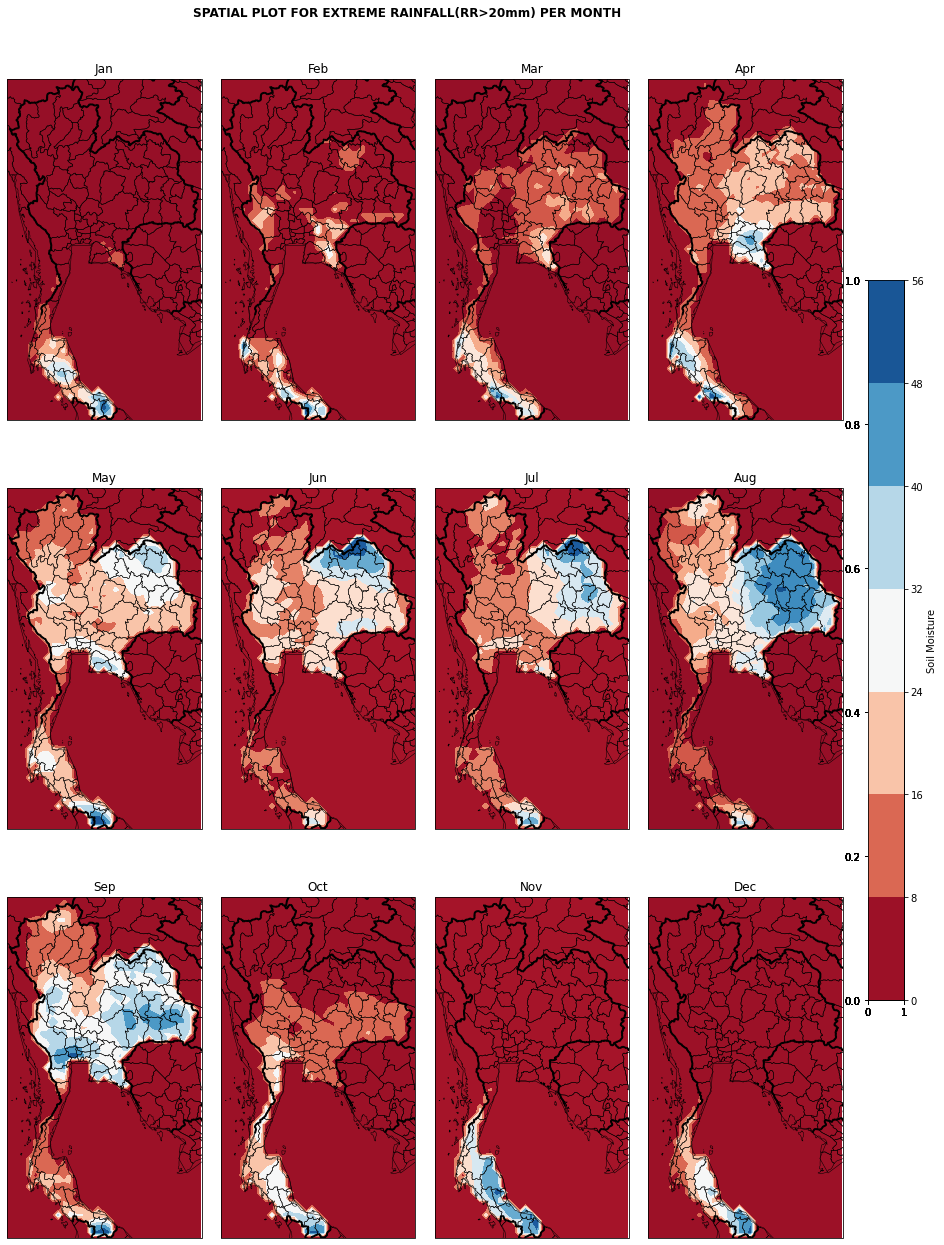

In [123]:
# spatial plots for XTREME RAINFALL 
fig,ax=plt.subplots(3,4,figsize=(20,20), 
                    subplot_kw={'projection': ccrs.PlateCarree()},squeeze=0.1)
ax=ax.flatten()
month_names=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
for i in range(12):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.STATES, linewidth=0.5)
#     ax[i].add_feature(cfeature.OCEAN)
#     ax[i].add_feature(cfeature.LAKES, color='blue')
#     ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([97.25,105.8,20.75,5.75])
    
    ax[i].set_title(month_names[i])
    cb= ax[i].contourf(Xrain20M.lon, Xrain20M.lat, Xrain20M[i],
                       cmap='RdBu', transform=ccrs.PlateCarree(),zorder=-2)
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='Soil Moisture')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('SPATIAL PLOT FOR EXTREME RAINFALL(RR>20mm) PER MONTH', fontweight='bold');
plt.savefig('done.png');

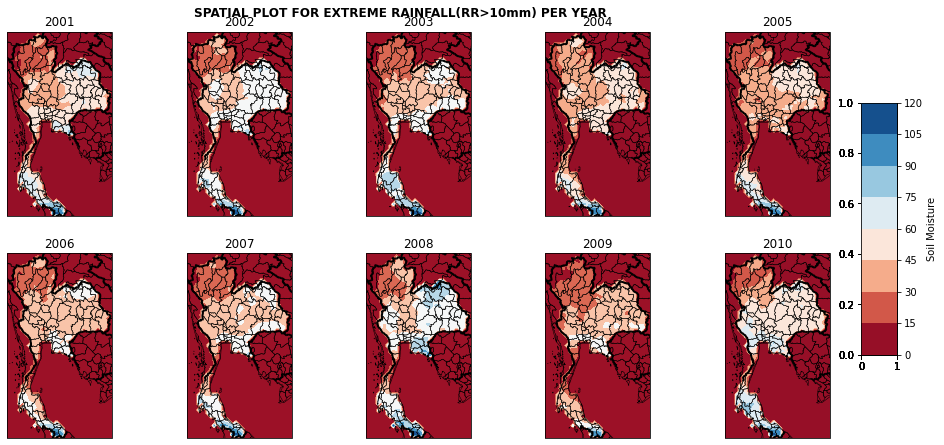

In [124]:
# spatial plots for dry days per year
fig,ax=plt.subplots(2,5,figsize=(20,7), 
                    subplot_kw={'projection': ccrs.PlateCarree()})
ax=ax.flatten()
month_names=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct']
for i in range(10):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.STATES, linewidth=0.5)
#     ax[i].add_feature(cfeature.OCEAN)
#     ax[i].add_feature(cfeature.LAKES, color='blue')
#     ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([97.25,105.8,20.75,5.75])
    ax[i].set_title(annual_totals.year.data[i])
    cb= ax[i].contourf(Xrain10.lon, Xrain10.lat, Xrain10[i],
                       cmap='RdBu', transform=ccrs.PlateCarree(),zorder=-2)
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='Soil Moisture')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('SPATIAL PLOT FOR EXTREME RAINFALL(RR>10mm) PER YEAR', fontweight='bold');
plt.savefig('done.png');

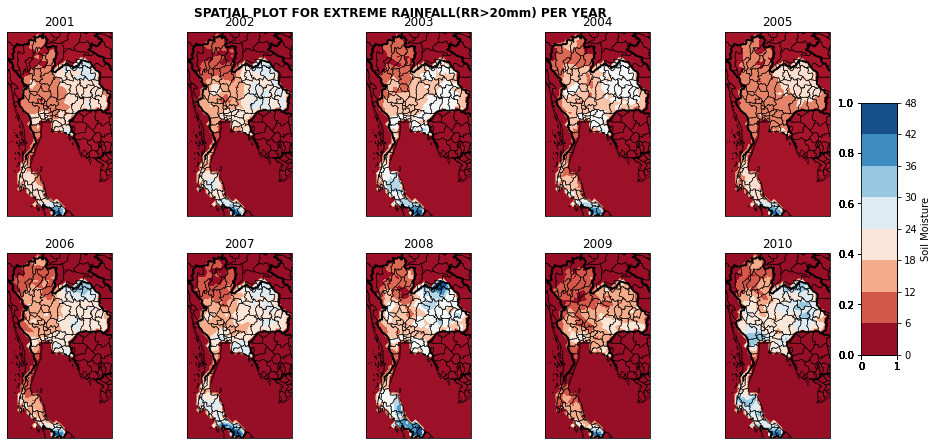

In [125]:
# spatial plots for dry days per year
fig,ax=plt.subplots(2,5,figsize=(20,7), 
                    subplot_kw={'projection': ccrs.PlateCarree()})
ax=ax.flatten()
month_names=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct']
for i in range(10):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.STATES, linewidth=0.5)
#     ax[i].add_feature(cfeature.OCEAN)
#     ax[i].add_feature(cfeature.LAKES, color='blue')
#     ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([97.25,105.8,20.75,5.75])
    ax[i].set_title(annual_totals.year.data[i])
    cb= ax[i].contourf(Xrain20.lon, Xrain20.lat, Xrain20[i],
                       cmap='RdBu', transform=ccrs.PlateCarree(),zorder=-2)
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='Soil Moisture')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('SPATIAL PLOT FOR EXTREME RAINFALL(RR>20mm) PER YEAR', fontweight='bold');
plt.savefig('done.png');